In [ ]:
import numpy as np
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import random


In [ ]:
def generate_pupil_video(waveform, video_filename='pupil_movement.mp4', frame_size=(256, 256), pupil_radius=random.randint(25, 35), fps=60):
    """
    Generates a video of a horizontally moving pupil based on a given waveform.

    Parameters:
    - waveform: list of amplitude values (ranging from -1 to 1).
    - video_filename: name of the output video file.
    - frame_size: tuple (width, height) of the video frames.
    - pupil_radius: radius of the pupil in pixels.
    - fps: frames per second of the output video.
    """
    # Unpack frame size
    width, height = frame_size

    # Define the maximum offset the pupil can move while staying fully inside the frame
    max_offset = (width // 2.2) - pupil_radius

    # Initialize the video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(video_filename, fourcc, fps, frame_size, isColor=False)

    # Generate random sizes for the pupil to simulate a non-circular shape
    pupil_width = random.randint(pupil_radius, pupil_radius + 5)  # Horizontal axis length
    pupil_height = random.randint(pupil_radius, pupil_radius + 5)  # Vertical axis length
    
    # Add some irregularity to the shape
    angle = random.randint(-15, 15)  # Random rotation angle for the ellipse

    for amplitude in waveform:
        # Map amplitude (-1 to 1) to horizontal position (-max_offset to +max_offset)
        x_offset = int(amplitude * max_offset)

        # Create a blank frame (background is black)
        frame = np.zeros((height, width), dtype=np.uint8)

        # Calculate the center of the pupil
        center_x = (width // 2) + x_offset
        center_y = height // 2

        # # Option 1: Draw the pupil as a filled circle (white color)
        # cv2.circle(frame, (center_x, center_y), pupil_radius, 255, -1)

        # Option 2: Draw the pupil as a filled ellipse (white color)
        cv2.ellipse(
            frame,
            (center_x, center_y),
            (pupil_width, pupil_height),  # Varying axes lengths
            angle,
            0,
            360,
            255,  # White color for the pupil
            -1  # Fill the ellipse
        )

        # Write the frame to the video
        out.write(frame)

    # Release the video writer
    out.release()
    print(f"Video saved as {video_filename}")

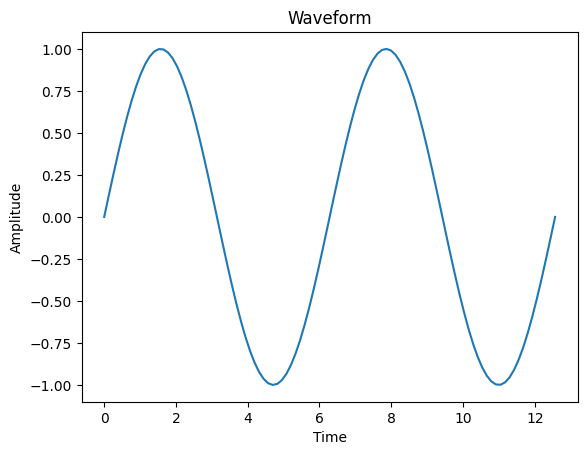

In [ ]:
# Example usage:
# Generate a sine wave as the waveform input

# Generate a sample waveform (sine wave)
t = np.linspace(0, 4 * np.pi, 100)  # 100 frames
waveform = np.sin(t)

# Visualize the waveform
plt.plot(t, waveform)
plt.title("Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [ ]:

# Generate the video using the waveform
generate_pupil_video(waveform, fps=60)

Video saved as pupil_movement.mp4
